# **Sleep Health & Lifestyle Analysis**


## **About DataSet**

This Dataset consists of 400 rows and 13 columns, encompassing a diverse set of variables pertaining to sleep and daily routines. The dataset provides information on various aspects including gender, age, profession, duration of sleep, sleep quality, level of physical activity, stress levels, BMI category, blood pressure, heart rate, daily step count, and the presence or absence of sleep disorders.

**Data explanation provided:**
* **Person ID:** An identifier for each individual.
* **Gender:** The gender of the person (Male/Female).
* **Age:** The age of the person in years.
* **Occupation:** The occupation or profession of the person.
* **Sleep Duration (hours):** The number of hours the person sleeps per day.
* **Quality of Sleep (scale: 1-10):** A subjective rating of the quality of sleep, ranging from 1 to 10.
* **Physical Activity Level (minutes/day):** The number of minutes the person engages in physical activity daily.
* **Stress Level (scale: 1-10):** A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
* **BMI Category:** The BMI category of the person (e.g., Underweight, Normal, Overweight).
* **Blood Pressure (systolic/diastolic):** The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
* **Heart Rate (bpm):** The resting heart rate of the person in beats per minute.
* **Daily Steps:** The number of steps the person takes per day.
* **Sleep Disorder:** The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

**Objective:** 

**Tasks we will perform on this jupyter notebook:**

**Data Cleaning:**
* Data Cleaning.
* Feature Enginering.

**Data Preparation:**
* Apply label encoding to the categorical features
* Utilice the standard scaler for feature scaling 

**Clustering:**
* Apply Elbow Method, to determine the optimal number of clusters for the data. 
* Apply Agglomerative Clustering algorithm to create the clusters. 
* Analyze and explore the characteristics of each cluster.

## **LIbraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# LOADING THE DATA
df = pd.read_csv("Sleep_health.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## **Understanding The Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
dup = df[df.duplicated()]
dup

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In this case because the mean and median are very similar, it is most likely that the data are normally distributed. 

In [7]:
df.describe(include = "O").T

,count,unique,top,freq
Gender,374,2,Male,189
Occupation,374,11,Nurse,73
BMI Category,374,4,Normal,195
Blood Pressure,374,25,130/85,99
Sleep Disorder,374,3,None,219


In [8]:
# CHEKING NULL VALUES
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
# CHEKING DUPLICATE VALUES
dup = df[df.duplicated()]
dup

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder


In [10]:
# CHEKING UNIQUE VALUES IN THE CATEGORICAL FEATURES
print("\nUnique values in Occupation:\n\n", df["Occupation"].value_counts(), "\n")
print("\nUnique values in BMI Category:\n\n", df["BMI Category"].value_counts(), "\n")
print("\nUnique values in Sleep Disorder:\n\n", df["Sleep Disorder"].value_counts(), "\n")


Unique values in Occupation:

 Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64 


Unique values in BMI Category:

 Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64 


Unique values in Sleep Disorder:

 None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64 



## **Data Cleaning**

**Science Classification**
* **Health Sciences:** Nurse, Doctor.
* **Applied Sciences:** Engineer, Software Engineer.
* **Pure Sciences:** Scientist.
* **Social Sciences:** Lawyer, Accountant, Salesperson, Sales Representative, Manager.
* **Human Sciences:** Teacher.

In [11]:
sector = []
for i in df["Occupation"]:
    if i == "Nurse" or i == "Doctor":
        sector.append("Health Sciences")
    elif i == "Engineer" or i == "Software Engineer":
        sector.append("Applied Sciences")
    elif i == "Lawyer" or i == "Accountant" or i == "Salesperson" or i == "Sales Representative" or i == "Manager":
        sector.append("Social Sciences")
    elif i == "Teacher":
        sector.append("Human Sciences")
    else:
        sector.append("Pure Sciences")
        
df["Occupation Branch"] = sector

**Blood Pressure Categories**
* **Normal:** -120 / -80.
* **High:** 120-129 / -80.
* **Hypertension 1:** 130-139 / 80-89.
* **Hypertension 2:** +140 / +90.
* **Hypertension crisi:** +180 / +120

In [12]:
# Extraction of systolic and diastolic pressure values
df["Systolic BP"] = df["Blood Pressure"].str.split("/").str[0]
df["Systolic BP"] = df["Systolic BP"].astype("int64")
df["Diastolic BP"] = df["Blood Pressure"].str.split("/").str[1]
df["Diastolic BP"] = df["Diastolic BP"].astype("int64")

In [13]:
# Blood pressure categorization
cat = []
for i in df["Systolic BP"]:
    if i < 120:
        cat.append("Normal")
    elif i >= 120 and i <= 129:
        cat.append("High")
    elif i >= 130 and i <= 139:
        cat.append("Hypertension 1")
    elif i >= 140:
        cat.append("Hypertension 2")
    else:
        cat.append("Hypertension crisis")
        
df["BP Category"] = cat

In [14]:
# Heart Rate classification
rate = []
for i in df["Heart Rate"]:
    if i < 60:
        rate.appedn("Bradycardia")
    elif i > 60 and i < 100:
        rate.append("Normal")
    else:
        rate.append("Tachycardia")

df["BPM Classification"] = rate

In [15]:
df["BMI Category"] = df["BMI Category"].str.replace("Normal Weight", "Normal")

## **Data Analysis And Visualization**

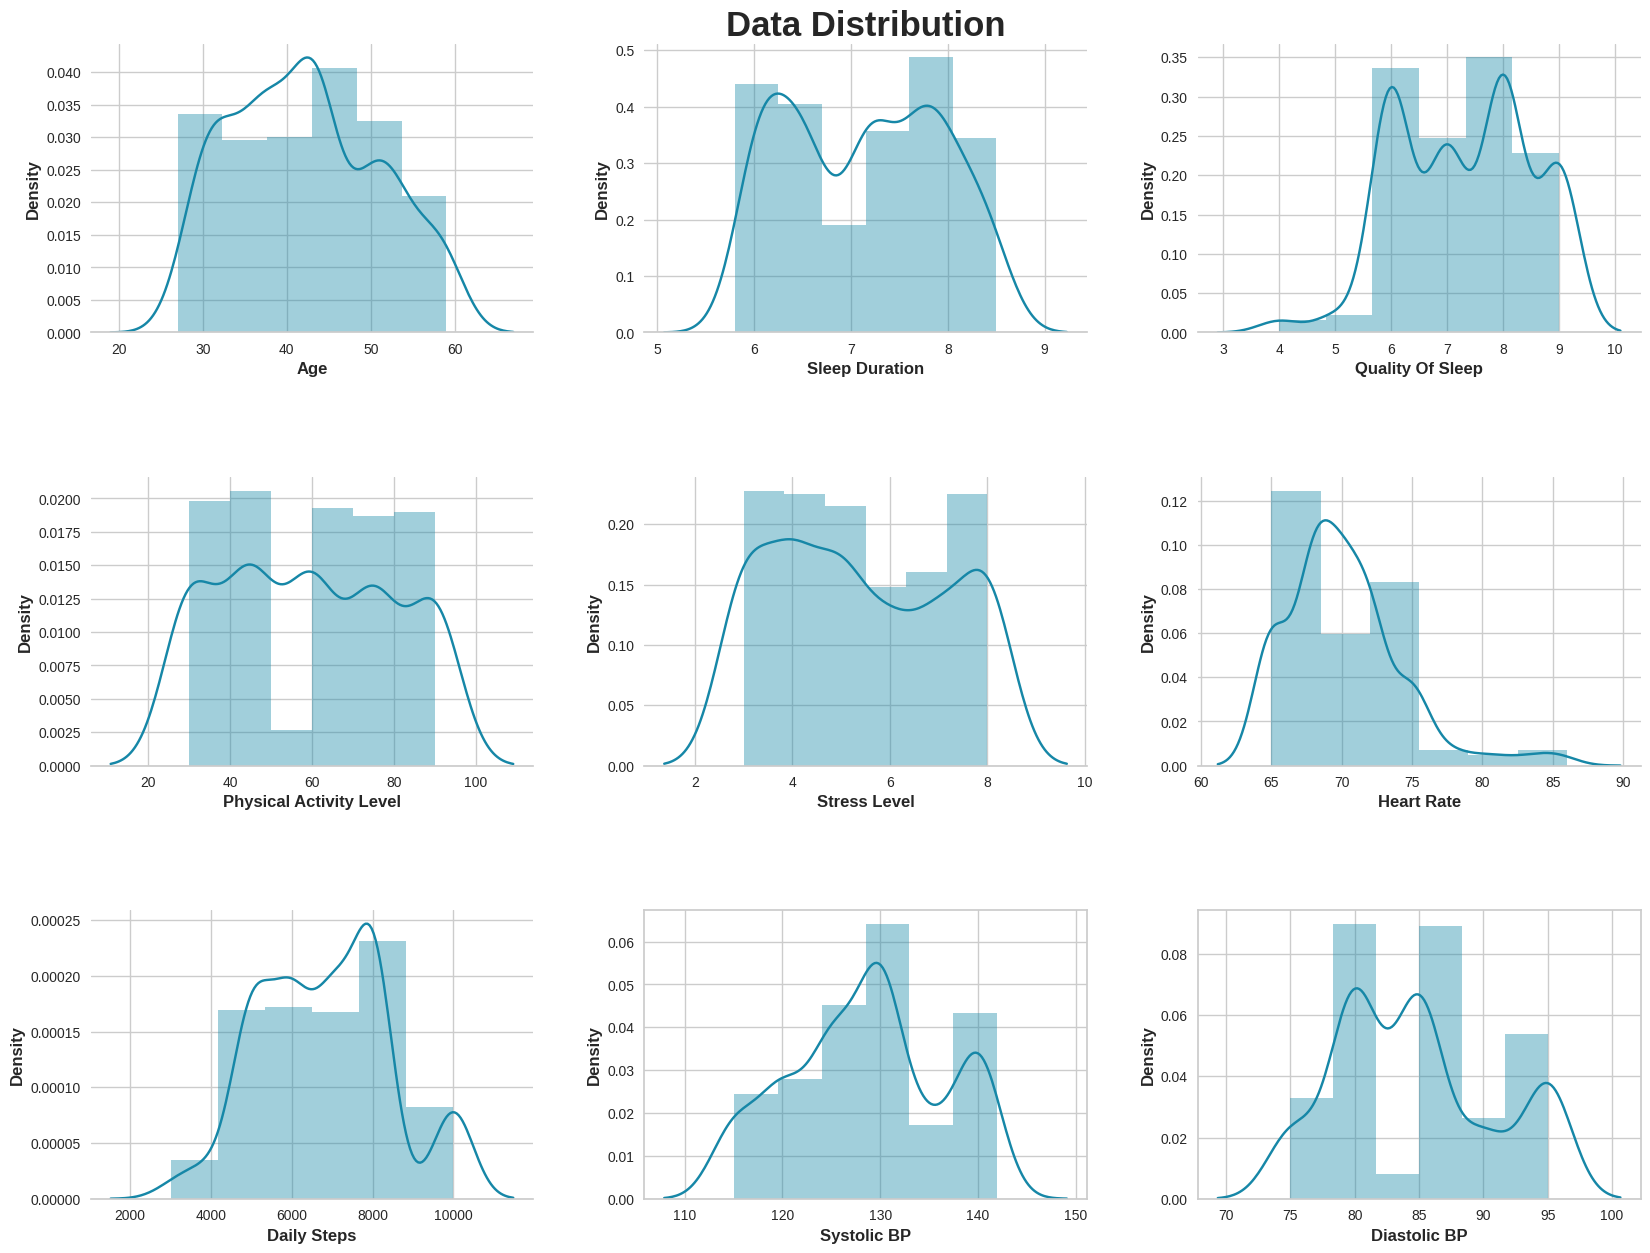

In [16]:
#POSITION
fig = plt.figure(figsize = (20,15))
gs = fig.add_gridspec(nrows = 3, ncols = 3, wspace = 0.25, hspace = .5)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1])
ax9 = fig.add_subplot(gs[2,2])

#AGE
sns.distplot(df["Age"], kde = True, bins = 6, color = "#1687A7", ax = ax1)
ax1.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax1.set_xlabel("Age", fontsize = 12, fontweight = "bold")

#SLEEP DURATION
ax2.set_title("Data Distribution", fontsize = 25, fontweight = "bold")
sns.distplot(df["Sleep Duration"], kde =  True, bins = 6, color = "#1687A7", ax = ax2)
ax2.set_ylabel("Density", fontsize = 12,fontweight = "bold")
ax2.set_xlabel("Sleep Duration", fontsize = 12, fontweight = "bold")

#QUALITY OF SLEEP
sns.distplot(df["Quality of Sleep"], kde = True, bins = 6, color = "#1687A7", ax = ax3)
ax3.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("Quality Of Sleep", fontsize = 12, fontweight = "bold")

#Physical Activity Level
sns.distplot(df["Physical Activity Level"], kde = True, bins = 6, color = "#1687A7", ax =  ax4)
ax4.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax4.set_xlabel("Physical Activity Level", fontsize = 12, fontweight = "bold")

#Stress Level
sns.distplot(df["Stress Level"], kde= True, bins = 6, color = "#1687A7", ax = ax5)
ax5.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax5.set_xlabel("Stress Level", fontsize = 12, fontweight = "bold")

#Heart Rate
sns.distplot(df["Heart Rate"], kde = True, bins = 6, color = "#1687A7", ax = ax6)
ax6.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax6.set_xlabel("Heart Rate", fontsize = 12, fontweight = "bold")

#Daily Steps
sns.distplot(df["Daily Steps"], kde = True, bins = 6, color = "#1687A7", ax  = ax7)
ax7.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax7.set_xlabel("Daily Steps", fontsize = 12, fontweight = "bold")

#Systolic BP
sns.distplot(df["Systolic BP"], kde = True, bins = 6, color = "#1687A7", ax  = ax8)
ax8.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax8.set_xlabel("Systolic BP", fontsize = 12, fontweight = "bold")

#Diastolic BP
sns.distplot(df["Diastolic BP"], kde = True, bins = 6, color = "#1687A7", ax  = ax9)
ax9.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax9.set_xlabel("Diastolic BP", fontsize = 12, fontweight = "bold")


for i in ["left", "right", "top"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    
plt.show()

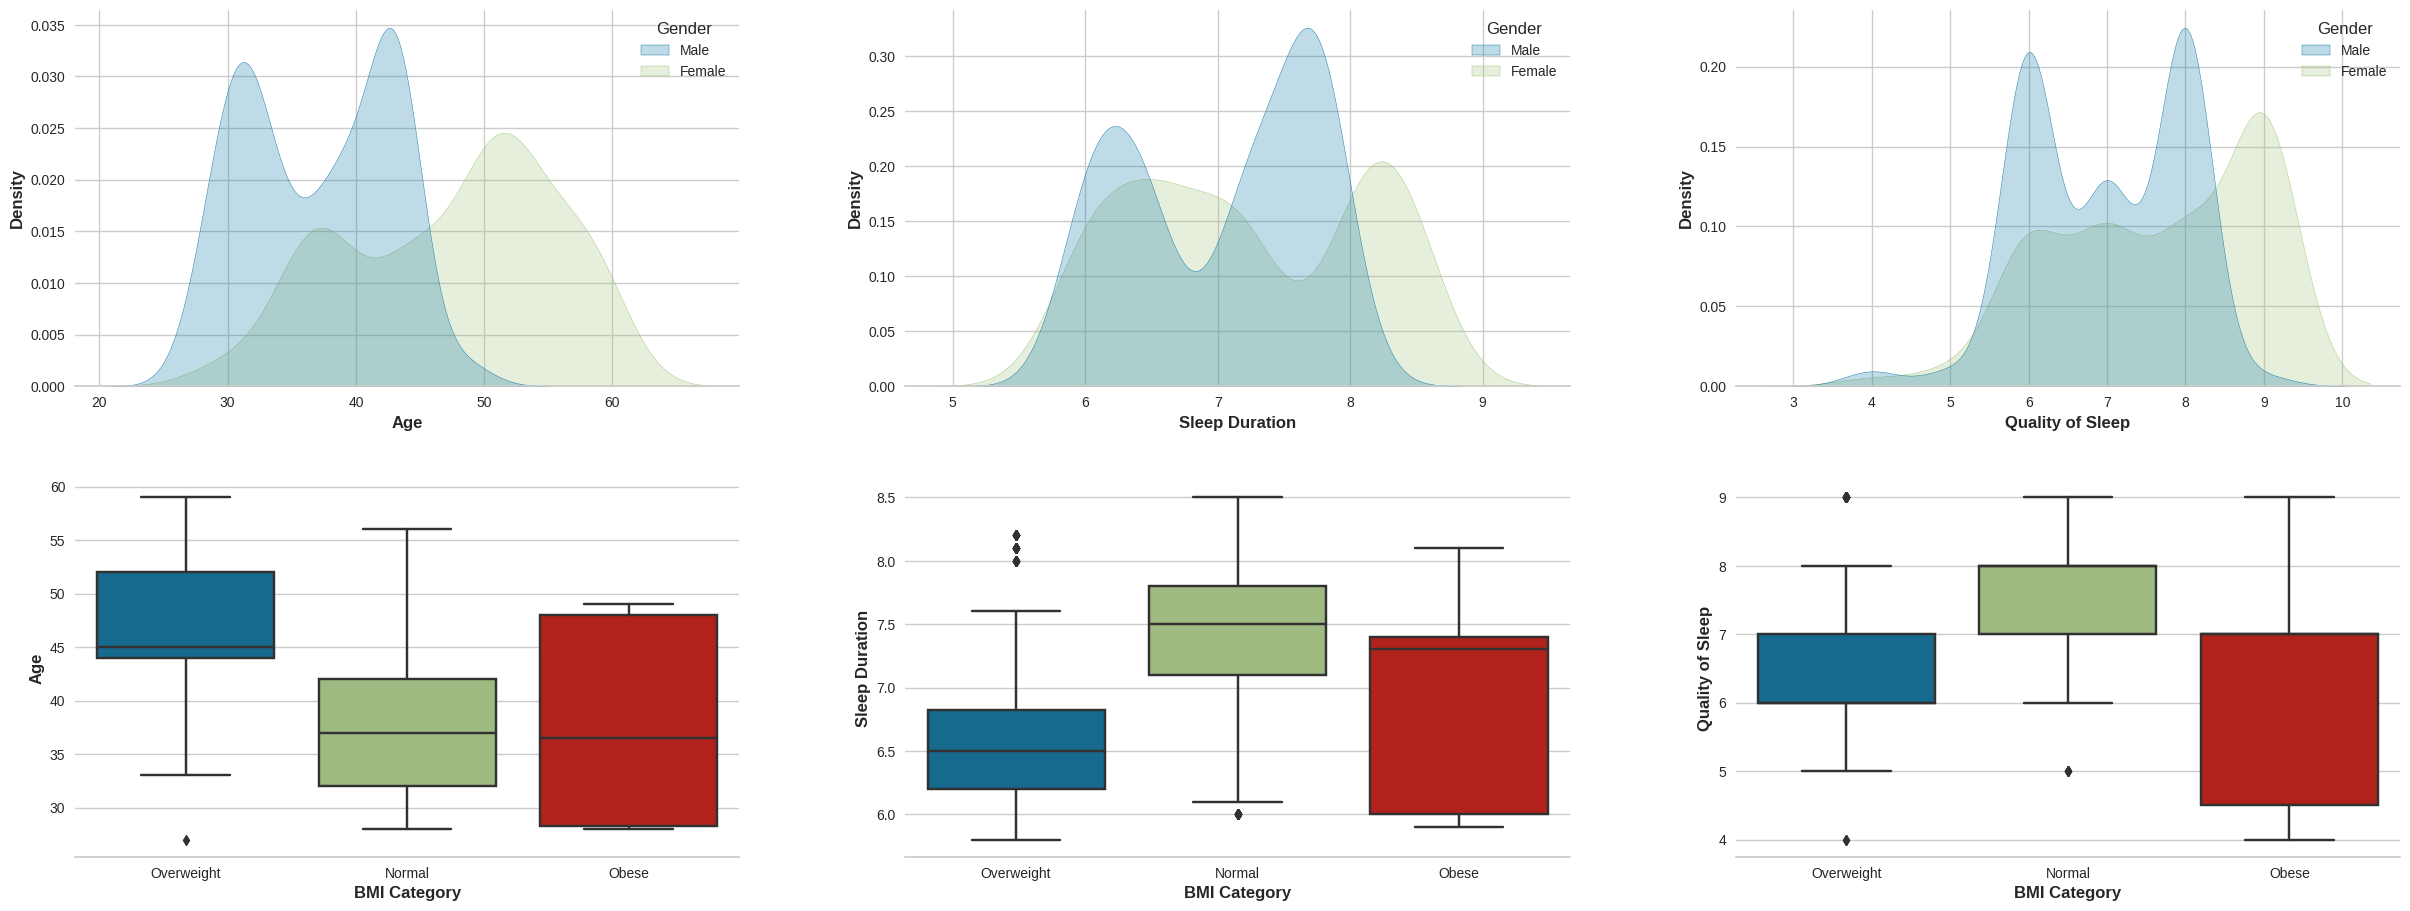

In [17]:
#POSITION
fig = plt.figure(figsize = (30,11))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = .25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

#BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)
ax4.set_facecolor(background)
ax5.set_facecolor(background)

#AGE
sns.kdeplot(data = df, x = "Age", shade = True, hue = "Gender", ax = ax0)
ax0.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax0.set_xlabel("Age", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Age", ax = ax3)
ax3.set_ylabel("Age", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("BMI Category", fontsize = 12, fontweight = "bold")

#SLEEP DURATION
sns.kdeplot(data = df, x = "Sleep Duration", shade = True, hue = "Gender", ax = ax1)
ax1.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax1.set_xlabel("Sleep Duration", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Sleep Duration", ax = ax4)
ax4.set_ylabel("Sleep Duration", fontsize = 12, fontweight = "bold")
ax4.set_xlabel("BMI Category", fontsize = 12, fontweight = "bold")

#QUALITY OF SLEEP
sns.kdeplot(data = df, x = "Quality of Sleep", shade = True, hue = "Gender", ax = ax2)
ax2.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax2.set_xlabel("Quality of Sleep", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Quality of Sleep", ax = ax5)
ax5.set_ylabel("Quality of Sleep", fontsize = 12, fontweight = "bold")
ax5.set_xlabel("BMI Category", fontsize = 12, fontweight = "bold")

for i in ["top", "right", "left"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

plt.show()

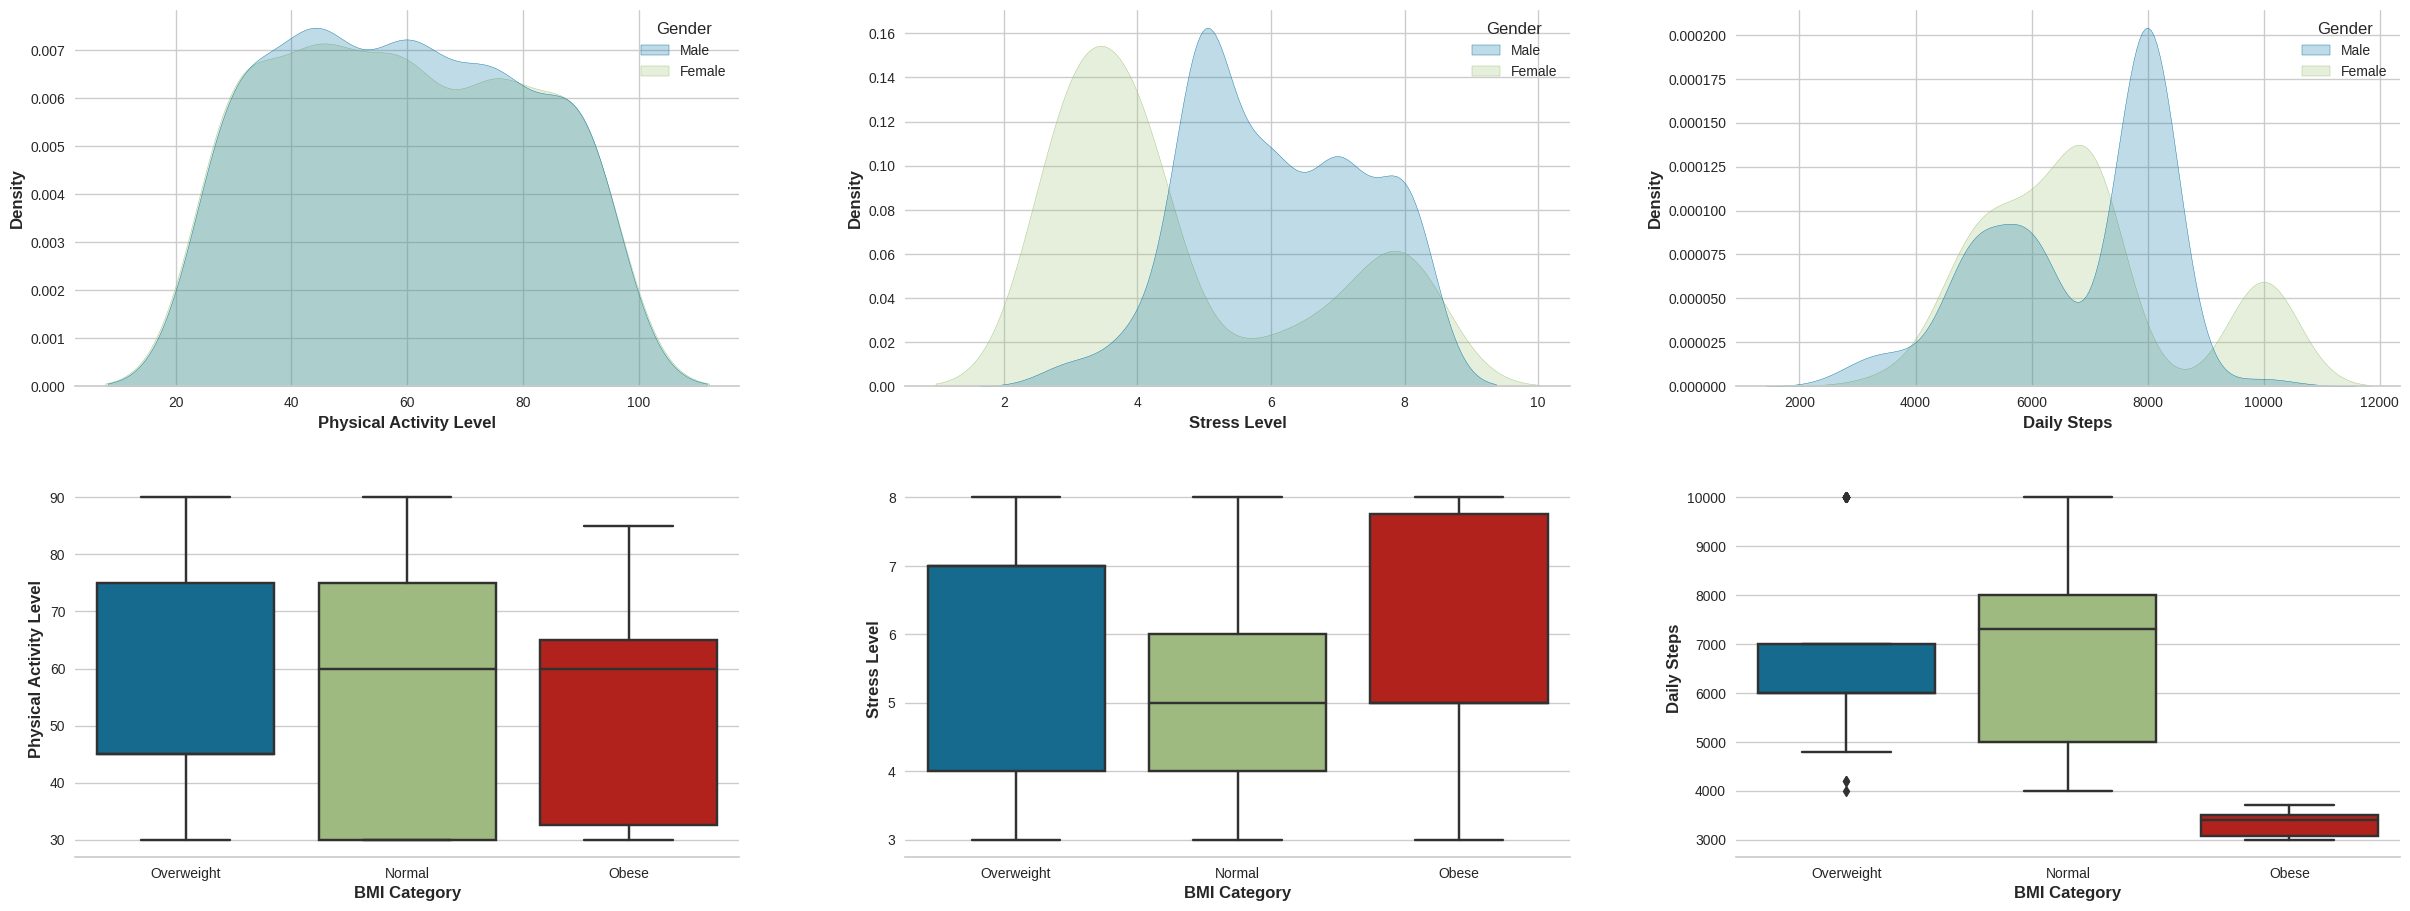

In [18]:
#POSITION
fig = plt.figure(figsize = (30,11))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = .25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

#BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)
ax4.set_facecolor(background)
ax5.set_facecolor(background)

#Physical Activity Level
sns.kdeplot(data = df, x = "Physical Activity Level", shade = True, hue = "Gender", ax = ax0)
ax0.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax0.set_xlabel("Physical Activity Level", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Physical Activity Level", ax = ax3)
ax3.set_ylabel("Physical Activity Level", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("BMI Category", fontsize = 12, fontweight = "bold")

#Stress Level
sns.kdeplot(data = df, x = "Stress Level", shade = True, hue = "Gender", ax = ax1)
ax1.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax1.set_xlabel("Stress Level", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Stress Level", ax = ax4)
ax4.set_ylabel("Stress Level", fontsize = 12, fontweight = "bold")
ax4.set_xlabel("BMI Category",fontsize = 12, fontweight = "bold")

#Daily Steps
sns.kdeplot(data = df, x = "Daily Steps", shade = True, hue = "Gender", ax = ax2)
ax2.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax2.set_xlabel("Daily Steps", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Daily Steps", ax = ax5)
ax5.set_ylabel("Daily Steps",fontsize = 12, fontweight = "bold")
ax5.set_xlabel("BMI Category",fontsize = 12, fontweight = "bold")

for i in ["top", "right", "left"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    
plt.show()

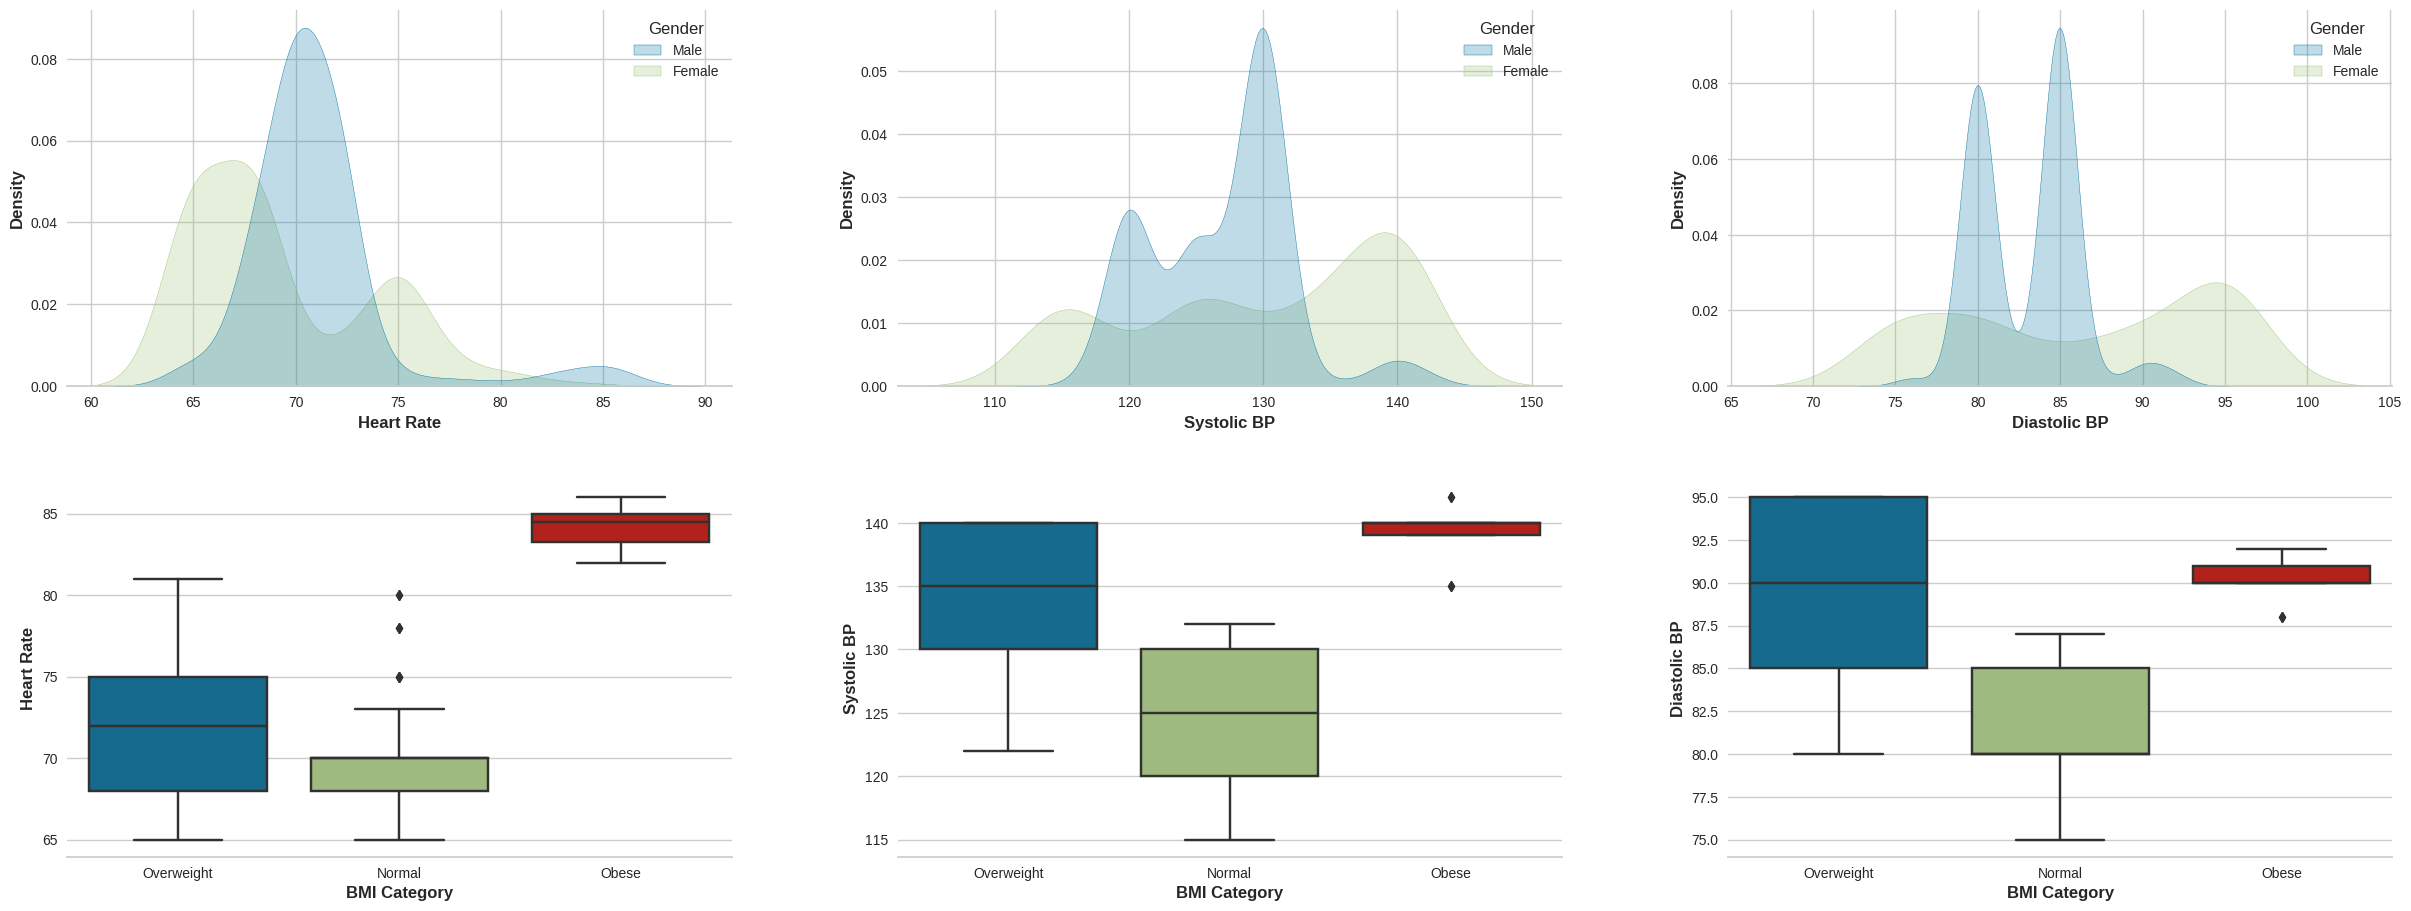

In [19]:
#POSITION
fig = plt.figure(figsize = (30,11))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = .25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

#BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)
ax4.set_facecolor(background)
ax5.set_facecolor(background)

#Heart Rate
sns.kdeplot(data = df, x = "Heart Rate", shade = True, hue = "Gender", ax = ax0)
ax0.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax0.set_xlabel("Heart Rate", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Heart Rate", ax = ax3)
ax3.set_ylabel("Heart Rate", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("BMI Category",fontsize = 12, fontweight = "bold")

#Systolic BP
sns.kdeplot(data = df, x = "Systolic BP", shade = True, hue = "Gender", ax = ax1)
ax1.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax1.set_xlabel("Systolic BP", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Systolic BP", ax = ax4)
ax4.set_ylabel("Systolic BP", fontsize = 12, fontweight = "bold")
ax4.set_xlabel("BMI Category", fontsize = 12, fontweight = "bold")

#Diastolic BP
sns.kdeplot(data = df, x = "Diastolic BP", shade = True, hue = "Gender", ax = ax2)
ax2.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax2.set_xlabel("Diastolic BP", fontsize = 12, fontweight = "bold")

sns.boxplot(data = df, x = "BMI Category", y = "Diastolic BP", ax = ax5)
ax5.set_ylabel("Diastolic BP", fontsize = 12, fontweight = "bold")
ax5.set_xlabel("BMI Category", fontsize = 12, fontweight = "bold")

for i in ["top", "right", "left"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

plt.show()

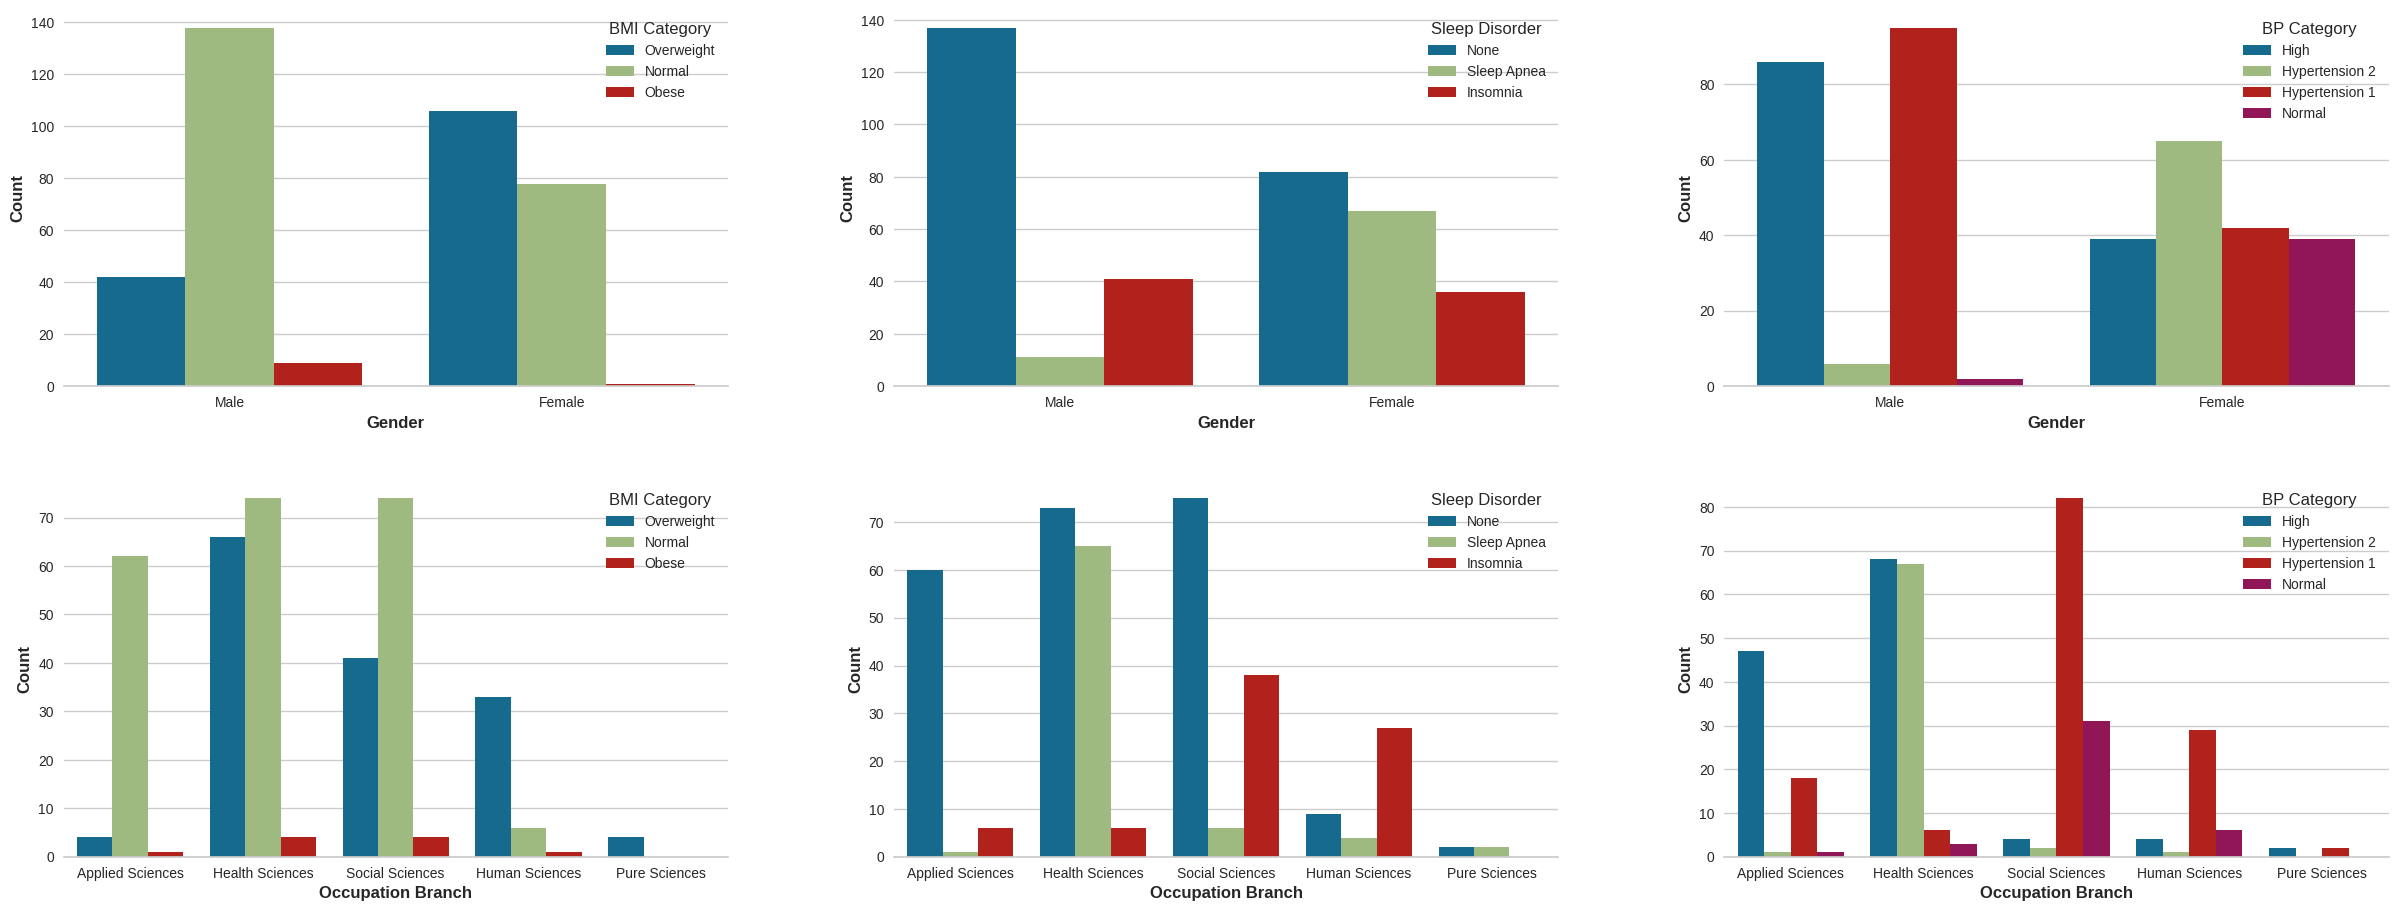

In [20]:
# POSITION
fig = plt.figure(figsize = (30,11))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = .25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


# GENDER
sns.countplot(data = df, x = "Gender", hue = "BMI Category", ax = ax0)
ax0.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax0.set_xlabel("Gender", fontsize = 12, fontweight = "bold")
ax0.legend(title = "BMI Category", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax0.spines[["top", "right", "left"]].set_visible(False)

sns.countplot(data = df, x = "Gender", hue = "Sleep Disorder", ax = ax1)
ax1.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax1.set_xlabel("Gender", fontsize = 12, fontweight = "bold")
ax1.legend(title = "Sleep Disorder", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax1.spines[["top", "right", "left"]].set_visible(False)

sns.countplot(data = df, x = "Gender", hue = "BP Category", ax = ax2)
ax2.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax2.set_xlabel("Gender", fontsize = 12, fontweight = "bold")
ax2.legend(title = "BP Category", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax2.spines[["top", "right", "left"]].set_visible(False)

# OCCUPATION BRANCH
sns.countplot(data = df, x = "Occupation Branch", hue = "BMI Category", ax = ax3)
ax3.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("Occupation Branch", fontsize = 12, fontweight = "bold")
ax3.legend(title = "BMI Category", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax3.spines[["top", "right", "left"]].set_visible(False)

sns.countplot(data = df, x = "Occupation Branch", hue = "Sleep Disorder", ax = ax4)
ax4.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax4.set_xlabel("Occupation Branch", fontsize = 12, fontweight = "bold")
ax4.legend(title = "Sleep Disorder", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax4.spines[["top", "right", "left"]].set_visible(False)

sns.countplot(data = df, x = "Occupation Branch", hue = "BP Category", ax = ax5)
ax5.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax5.set_xlabel("Occupation Branch", fontsize = 12, fontweight = "bold")
ax5.legend(title = "BP Category", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax5.spines[["top", "right", "left"]].set_visible(False)

**Women:**

* The majority of women are overweight.
* They are more prone to sleep disorders.
*  Most women have high blood pressure levels.

**Men:**

* Unlike women, the majority of men maintain a normal and healthy weight, despite having similar levels of physical activity.
* Most men do not suffer from sleep disorders.
* The majority have high blood pressure levels.

**Occupation Branch:**

* People working in the field of healthcare, followed by social sciences, show a greater decline in their overall health. However, this could be due to a strong presence of women within the healthcare field. As mentioned earlier, women appear to be more prone to overweight and Grade 2 hypertension.





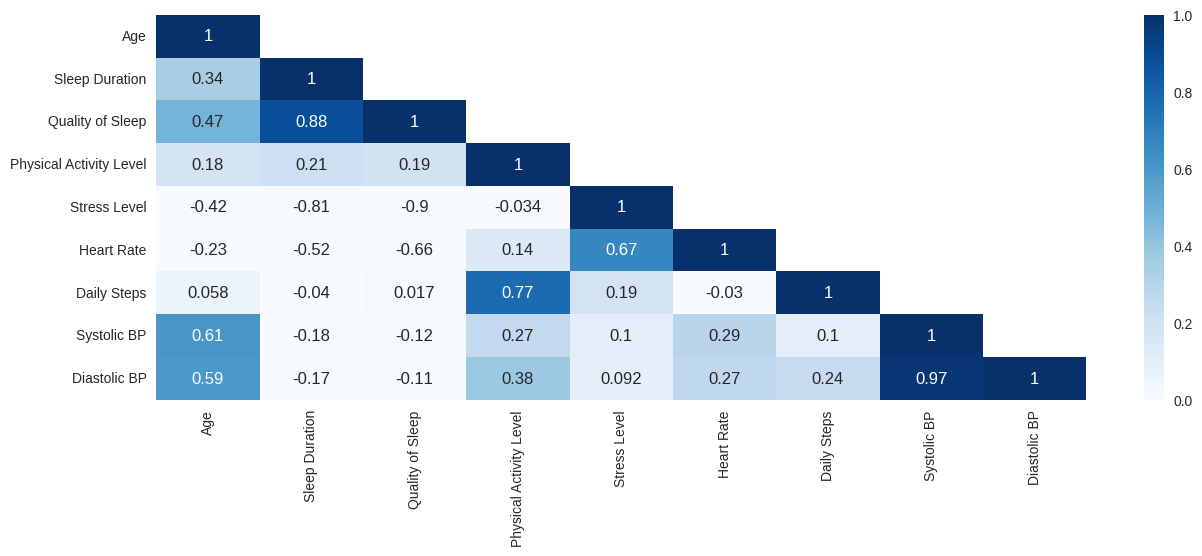

In [21]:
dfc = df.drop(columns = {"Person ID", "BPM Classification", "BP Category", "Occupation Branch", "Blood Pressure"}, axis = 1)
# VARIABLES
corr = dfc.corr()
mask = np.triu(np.ones_like(corr), k = 1)

# POSITION 
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(nrows = 1)
ax0 = fig.add_subplot(gs[0,0])


# CORRELATION MARIX
ax0.grid()
sns.heatmap(corr, annot = True, cmap = "Blues", vmin = 0, vmax = 1, ax = ax0, mask = mask)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 10)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize = 10)

for i in ["top", "right", "bottom", "left"]:
    ax0.spines[i].set_visible(False)
    
plt.show()

## **Data Preparation** 

In [22]:
# LIST OF CATEGORICAL FEATURES
cf = (df.dtypes == "object")
cols = list(cf[cf].index)

print(cols)

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder', 'Occupation Branch', 'BP Category', 'BPM Classification']


In [23]:
# LABEL ENCODING
le = LabelEncoder()
for i in cols:
    df[i] = df[[i]].apply(le.fit_transform)

## **Clustering**

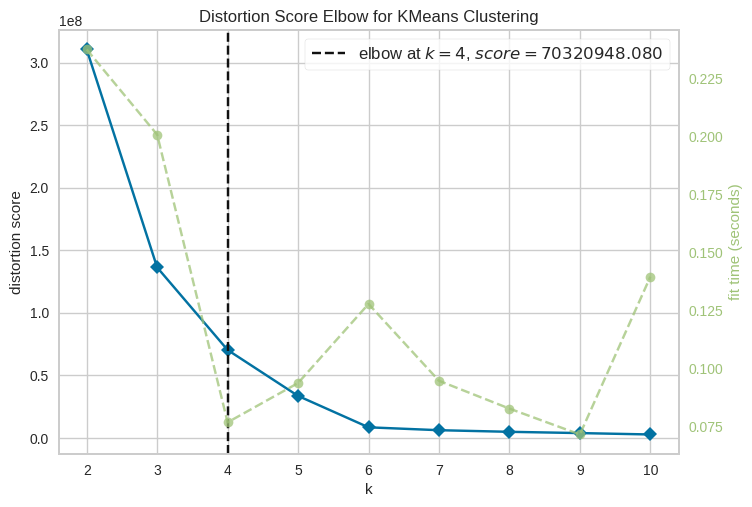

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# ELBOW METHOD
em = KElbowVisualizer(KMeans(), k=10)
em.fit(df)

em.show()

In [25]:
# AGGLOMERATIVE CLUSTERING
ac = AgglomerativeClustering(n_clusters=4)
acf = ac.fit_predict(df)
df["Cluster"] = acf

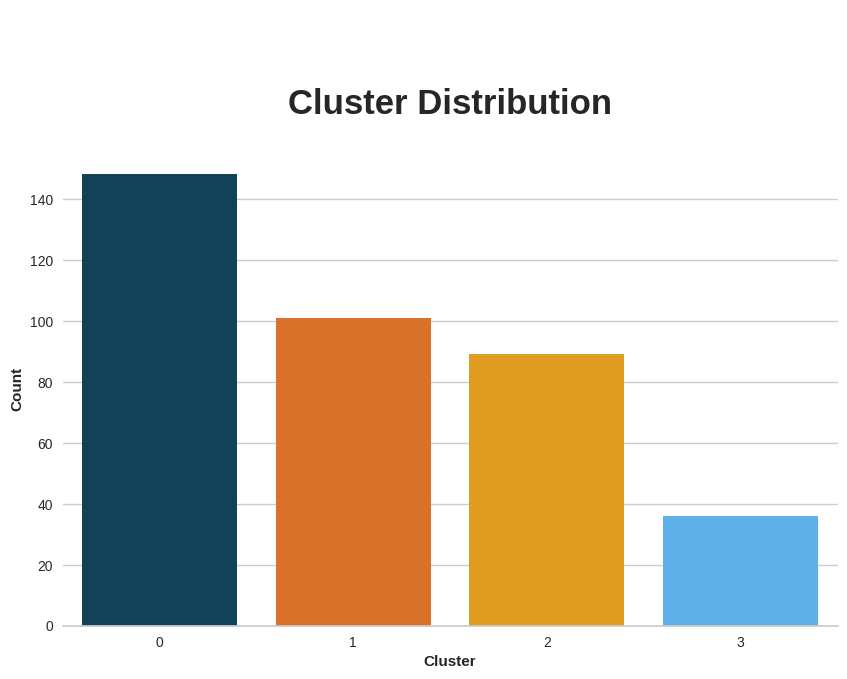

In [26]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]

# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Cluster Distribution",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
sns.countplot(data = df, x = "Cluster", palette = colors, ax = ax1)
ax1.set_ylabel("Count", fontweight = "bold")
ax1.set_xlabel("Cluster", fontweight = "bold")
ax1.spines[["top", "right", "left"]].set_visible(False)

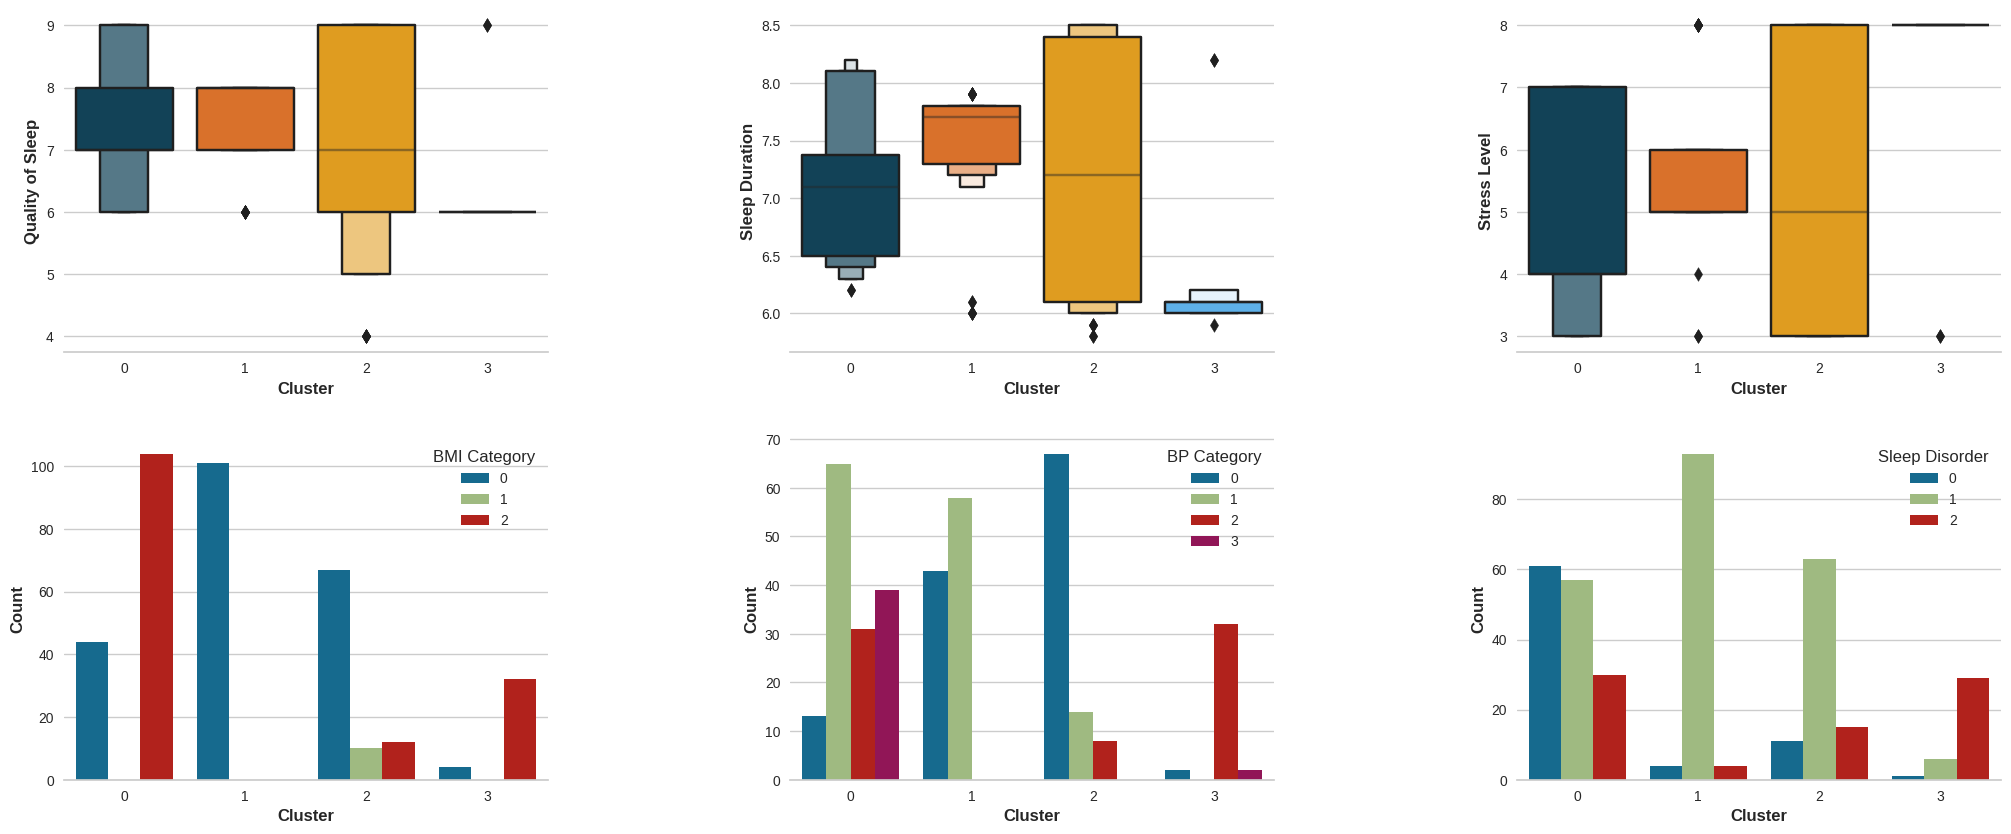

In [27]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]

# POSITION
fig = plt.figure(figsize = (25,10))
gs = fig.add_gridspec(nrows = 2, ncols = 3, hspace = .25, wspace = .5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[1,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)
ax4.set_facecolor(background)
ax5.set_facecolor(background)

# QUALITY SLEEP
sns.boxenplot(y=df["Quality of Sleep"],x=df["Cluster"], palette = colors , ax = ax0)
ax0.set_ylabel("Quality of Sleep", fontweight = "bold", fontsize = 12)
ax0.set_xlabel("Cluster", fontweight = "bold", fontsize = 12)

# SLEEP DURATION
sns.boxenplot(y=df["Sleep Duration"],x=df["Cluster"], palette = colors , ax = ax1)
ax1.set_ylabel("Sleep Duration", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Cluster", fontweight = "bold", fontsize = 12)

# STRESS LEVEL
sns.boxenplot(y=df["Stress Level"],x=df["Cluster"], palette = colors , ax = ax2)
ax2.set_ylabel("Stress Level", fontweight = "bold", fontsize = 12)
ax2.set_xlabel("Cluster", fontweight = "bold", fontsize = 12)

# BMI CATEGORY
sns.countplot(data = df, x = "Cluster", hue = "BMI Category", ax = ax3)
ax3.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax3.set_xlabel("Cluster", fontsize = 12, fontweight = "bold")
ax3.legend(title = "BMI Category", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax3.spines[["top", "right", "left"]].set_visible(False)

# SLEEP DISORDER
sns.countplot(data = df, x = "Cluster", hue = "Sleep Disorder", ax = ax4)
ax4.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax4.set_xlabel("Cluster", fontsize = 12, fontweight = "bold")
ax4.legend(title = "Sleep Disorder", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax4.spines[["top", "right", "left"]].set_visible(False)

# BP CATEGORY
sns.countplot(data = df, x = "Cluster", hue = "BP Category", ax = ax5)
ax5.set_ylabel("Count", fontsize = 12, fontweight = "bold")
ax5.set_xlabel("Cluster", fontsize = 12, fontweight = "bold")
ax5.legend(title = "BP Category", bbox_to_anchor=(1,1), loc="upper right", fontsize=10)
ax5.spines[["top", "right", "left"]].set_visible(False)

for i in ["left", "right", "top"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    
plt.show()

**Gender**
* Male **->** 1
* Female **->** 0

In [28]:
pd.options.display.float_format = '{:.2f}%'.format
pd.crosstab(df["Cluster"], df["Gender"], normalize = "index") * 100

Gender,0,1
Cluster,,
0,71.62%,28.38%
1,0.99%,99.01%
2,49.44%,50.56%
3,94.44%,5.56%


**BMI Category**
* Normal **->** 0
* Normal Weight **->** 1
* Obese **->** 2
* Overweight **->** 3

In [29]:
pd.crosstab(df["Cluster"], df["BMI Category"], normalize = "index") * 100

BMI Category,0,1,2
Cluster,,,
0,29.73%,0.00%,70.27%
1,100.00%,0.00%,0.00%
2,75.28%,11.24%,13.48%
3,11.11%,0.00%,88.89%


**Sleep Disorder**
* Insomnia **->** 0
* None **->** 1
* Sleep Apnea **->** 2

In [30]:
pd.crosstab(df["Cluster"], df["Sleep Disorder"], normalize = "index") * 100

Sleep Disorder,0,1,2
Cluster,,,
0,41.22%,38.51%,20.27%
1,3.96%,92.08%,3.96%
2,12.36%,70.79%,16.85%
3,2.78%,16.67%,80.56%


**Occupation Branch**
* Applied Sciences **->** 0
* Health Sciences **->** 1
* Human Sciences **->** 2
* Pure Sciences **->** 3
* Social Sciences **->** 4

In [31]:
pd.crosstab(df["Cluster"], df["Occupation Branch"], normalize = "index") * 100

Occupation Branch,0,1,2,3,4
Cluster,,,,,
0,3.38%,22.30%,23.65%,1.35%,49.32%
1,19.80%,38.61%,0.00%,0.00%,41.58%
2,47.19%,40.45%,5.62%,2.25%,4.49%
3,0.00%,100.00%,0.00%,0.00%,0.00%


**BP Category**
* High **->** 0
* Hypertension 1 **->** 1
* Hypertension 2 **->** 2
* Normal **->** 3

In [32]:
pd.crosstab(df["Cluster"], df["BP Category"], normalize = "index") * 100

BP Category,0,1,2,3
Cluster,,,,
0,8.78%,43.92%,20.95%,26.35%
1,42.57%,57.43%,0.00%,0.00%
2,75.28%,15.73%,8.99%,0.00%
3,5.56%,0.00%,88.89%,5.56%


## **Clustering Conclusions**

**Cluster 0:**
* The female gender predominates with 71.62%.
* 70.27% of the individuals in the cluster are obese.
* Slightly over 60% suffer from some sleep disorder.
* People in this cluster tend to be more frequently engaged in careers within the social sciences.
* Just over 60% suffer from hypertension, with Grade 1 hypertension being the most common.

**Cluster 1:**
* The male gender strongly predominates with 99%.
* Every single person in the cluster has a normal and healthy weight.
* Only a minority, around 8%, suffer from some sleep disorder.
* People in this cluster tend to be more frequently engaged in careers within the social sciences or health sciences.
* 90% of them have high blood pressure, and it is very concerning that 57% have Grade 2 hypertension.

**Cluster 2:**
* Comprised of both genders in very similar proportions.
* 75% have a normal weight, while only 25% have some anomaly regarding their weight.
* Around 87% suffer from some sleep disorder, with Sleep Apnea being the most frequent.
* People in this cluster tend to be more frequently engaged in careers within the applied sciences or health sciences.
* There is an evident presence of high blood pressure levels among the individuals in this cluster, although it is actually the healthiest cluster in that aspect since only 24% have any degree of hypertension.

**Cluster 3:**
* Strong predominance of the male gender with 94%.
* 88% of the individuals in this cluster suffer from overweight.
* Around 97% experience some sleep disorder, with Sleep Apnea being the most frequent.
* People in this cluster are engaged in careers within the health sciences.
* Just over 90% have high blood pressure levels, with Hypertension grade 1 being the most common at 88%.

Health varies significantly among the different identified clusters. While some clusters show better health in terms of weight, sleep quality, and blood pressure levels, others exhibit poorer health in these aspects. From the conducted analysis, the following conclusions can be drawn:

Gender appears to have some influence on people's health. For example, Cluster 0 is predominantly composed of women with obesity and sleep disorders, while Cluster 1 is predominantly composed of men with normal weight and a lower prevalence of sleep disorders.

The choice of occupation also seems to be related to health. In Cluster 3, where the majority of individuals work in healthcare-related careers, there is a higher prevalence of overweight, sleep disorders, and high blood pressure levels.

Hypertension is a common issue in several clusters, with Hypertension grade 1 being the most common. This highlights the importance of monitoring and controlling blood pressure in the studied population.

These conclusions can be utilized to guide health and wellness strategies tailored to each specific cluster, with the aim of improving quality of life and preventing or addressing the identified health issues within each group.